### Least square solution using Stochastic Gradient Descent

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/A2Q2Data_train.csv", header=None);

input_data_set = df.iloc[:].values
num_data_points = input_data_set.shape[0]
num_features = input_data_set.shape[1] - 1

feature_dataset = input_data_set[:, :-1] # for all but last column
class_label = input_data_set[:, -1] # for last column

X = feature_dataset
y = class_label

XtX = np.matmul(X.T, X)
XtX_inverse = np.linalg.inv(XtX)

W_ml = np.matmul(np.matmul(XtX_inverse, X.T), y)

#from sklearn.metrics import r2_score
#y_pred = np.matmul(X,W_ml)
#print(r2_score(y, y_pred))

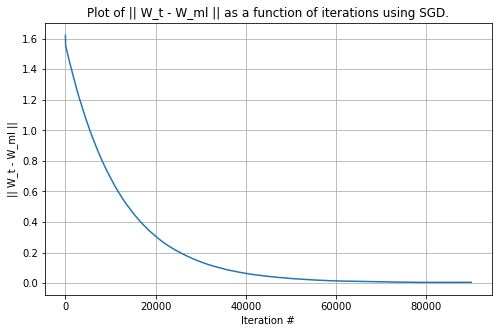

In [ ]:
W_diff_all = []
W = np.zeros((num_features))
lr = 0.001 #learning rate
epochs = 90000

batch_size = 100

X = feature_dataset
y = class_label

for i in np.arange(epochs):
  
  random_index = np.random.choice(num_data_points, batch_size, replace=False)
  batch_X = X[random_index]
  batch_y = y[random_index]

  W_diff = W - W_ml
  W_diff_all.append(np.sqrt(np.dot(W_diff, W_diff) ))

  batch_XtX = np.matmul(batch_X.T, batch_X)

  grad_f = (np.matmul(batch_XtX, W) - np.matmul(batch_X.T, batch_y)) / batch_size
  
  next_W = W - lr * grad_f
  W = next_W

#print(r2_score(y, np.matmul(X,W)))

plt.figure(figsize=(8, 5))
plt.title('Plot of || W_t - W_ml || as a function of iterations using SGD.')
plt.plot(W_diff_all)
plt.xlabel('Iteration #')
plt.ylabel('|| W_t - W_ml ||')
plt.grid()
plt.show()